In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O3','C3']
psi_dihedral=['C1','O3','C3','C4']

di_sugar=['GLC', 'GLC']
patterns1= ['GLC(*_*_)]-GLC(*_*_)', 'GLC(*_*_)-GLC(*_*_)','GLC(*_*_)]-[*]-GLC(*_*_)', 'GLC(*_*_)-[*]-GLC(*_*_)']
patterns2= ['DGlcpa1-3DGlcpa', 'DGlcpa1-3]DGlcpa', 'DGlcpa1-3[*]DGlcpa']
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-3D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['146D', '146D', '1A14', '1ABR', '1ABR', '1AGM', '1AGM', '1AX0', '1AX1', '1AX2', '1AXY', '1AXZ', '1AY2', '1B37', '1B5F', '1B5F', '1B5F', '1B5F', '1B5Q', '1BCS', '1BHG', '1BHG', '1BJI', '1BLF', '1BP8', '1BP8', '1BP8', '1BP8', '1BZB', '1C1Z', '1C39', '1C39', '1C3M', '1CAP', '1CF3', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CKL', '1CLY', '1CLZ', '1CP8', '1CP8', '1CPO', '1CT1', '1CT1', '1CVI', '1CVI', '1CVI', '1CVN', '1CVN', '1CVN', '1CVN', '1CXP', '1CXP', '1D2V', '1D2V', '1D5L', '1D5L', '1D7W', '1D7W', '1D83', '1D83', '1DBG', '1DBO', '1DEO', '1DEX', '1DGL', '1DGL', '1DIY', '1DL2', '1DN2', '1DN2', '1DNU', '1DNU', '1DNW', '1DNW', '1DOG', '1DOG', '1DP5', '1DPJ', '1DWA', '1DWA', '1DWF', '1DWF', '1DWG', '1DWG', '1DWH', '1DWH', '1DWI', '1DWI', '1DWJ', '1DWJ', '1DZH', '1E04', '1E05', '1E4K', '1E4K', '1E4M', '1E4M', '1E6Q', '1E6Q', '1E6S', '1E6S', '1E6X', '1E6X', '1E70', '1E70', '1E71', '1E71', '1E72', '1E72', '1E73', '1E73

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 1 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 1 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 73 
valid torsion1 and torsion2: (73, 73)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['6.C', '5.C'], ['4C1', '4C1'])
(['5.C', '4.C'], ['4C1', '4C1'])
(['4.C', '3.C'], ['4C1', '4C1'])
(['3.C', '2.C'], ['4C1', '-'])
(['2.C', '1.C'], ['-', '4C1'])
(['3.D', '2.D'], ['4C1', '4C1'])
(['2.D', '1.D'], ['4C1', '-'])
(['4.E', '3.E'], ['4C1', '4C1'])
(['3.E', '2.E'], ['4C1', '4C1'])
(['2.E', '1.E'], ['4C1', '4C1'])
(['9.r', '8.r'], ['4C1', '4C1'])
(['8.r', '7.r'], ['4C1', '4C1'])
(['2.C', '1.C'], ['4C1', '4C1'])
(['2.D', '1.D'], ['4C1', '4H5'])
(['2.B', '1.B'], ['4C1', '4C1'])
(['5.B', '4.B'], ['4C1', '-'])
(['4.B', '3.B'], ['-', '4C1'])
(['3.B', '2.B'], ['4C1', '-'])
(['2.B', '1.B'], ['-', '4C1'])
(['2.C', '1.C'], ['4C1', '4C1'])
(['2.B', '1.B'], ['4C1', '4C1'])
(['7.C', '6.C'], ['3S1', '-'])
(['8.C', '6.C'], ['-', '-'])
(['2.A', '1.A'], ['4C1', '4C1'])
(['2.B', '1.B'], ['4C1', '-'])
(['3.B', '2.B'], ['4C1', '4C1'])
(['4.B', '1.B'], ['BO3', '-'])
(['9.r', '8.r'], ['4C1', '4C1'])
(['8.r', '7.r'], ['4C1', '4C1'])
(['2.J', '1.J'], ['4C1', '-'])
(['3.E', '2.E'], ['4C1', '4C1'])
(['

In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//6t18.pdb C GLC 6 C1
../../pdbs//6t18.pdb C GLC 5 O3
19280 19276
No connection found between 19280 and 19276
0
../../pdbs//6t18.pdb C GLC 5 C1
../../pdbs//6t18.pdb C GLC 4 O3
19269 19265
Connection found between(2) 19269 and 19265
../../pdbs//6t18.pdb C GLC 4 C1
../../pdbs//6t18.pdb C GLC 3 O3
19258 19254
No connection found between 19258 and 19254
2
../../pdbs//6t18.pdb C GLC 3 C1
../../pdbs//6t18.pdb C GLC 2 O3
19247 19243
Connection found between(2) 19247 and 19243
../../pdbs//6t18.pdb C GLC 2 C1
../../pdbs//6t18.pdb C GLC 1 O3
19236 19232
No connection found between 19236 and 19232
4
../../pdbs//6t18.pdb D GLC 3 C1
../../pdbs//6t18.pdb D GLC 2 O3
19314 19310
Connection found between(2) 19314 and 19310
../../pdbs//6t18.pdb D GLC 2 C1
../../pdbs//6t18.pdb D GLC 1 O3
19303 19299
No connection found between 19303 and 19299
6
../../pdbs//6t18.pdb E GLC 4 C1
../../pdbs//6t18.pdb E GLC 3 O3
19359 19355
Connection found between(2) 19359 and 19355
../../pdbs//6t18.pdb E GLC 3 C1


In [13]:
output_df.to_csv('DGlcpa1-3DGlcpa_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv('DGlcpa1-3DGlcpa_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [14]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [15]:
instant1.torsions

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,6t18.pdb,C GLC 6 C2 C1 GLC 5 O3 C3,C GLC 6 C1 GLC 5 O3 C3 C4,242.124,348.6317,"([GLC(6_C_), GLC(5_C_)], [116.03, 103.01])",GLC(6_C_)-GLC(5_C_)-GLC(4_C_)-GLC(3_C_)-GLC(2_...,DGlcpa1-6DGlcpa1-3DGlcpa1-6DGlcpa1-3DGlcpa1-6D...,"([6.C, 5.C], [4C1, 4C1])"
1,6t18.pdb,C GLC 5 C2 C1 GLC 4 O3 C3,C GLC 5 C1 GLC 4 O3 C3 C4,172.415,94.4950,"([GLC(5_C_), GLC(4_C_)], [103.01, 91.87])",GLC(6_C_)-GLC(5_C_)-GLC(4_C_)-GLC(3_C_)-GLC(2_...,DGlcpa1-6DGlcpa1-3DGlcpa1-6DGlcpa1-3DGlcpa1-6D...,"([5.C, 4.C], [4C1, 4C1])"
2,6t18.pdb,C GLC 4 C2 C1 GLC 3 O3 C3,C GLC 4 C1 GLC 3 O3 C3 C4,247.234,341.1945,"([GLC(4_C_), GLC(3_C_)], [91.87, 94.88])",GLC(6_C_)-GLC(5_C_)-GLC(4_C_)-GLC(3_C_)-GLC(2_...,DGlcpa1-6DGlcpa1-3DGlcpa1-6DGlcpa1-3DGlcpa1-6D...,"([4.C, 3.C], [4C1, 4C1])"
3,6t18.pdb,C GLC 3 C2 C1 GLC 2 O3 C3,C GLC 3 C1 GLC 2 O3 C3 C4,210.453,97.1720,"([GLC(3_C_), GLC(2_C_)], [94.88, 119.11])",GLC(6_C_)-GLC(5_C_)-GLC(4_C_)-GLC(3_C_)-GLC(2_...,DGlcpa1-6DGlcpa1-3DGlcpa1-6DGlcpa1-3DGlcpa1-6D...,"([3.C, 2.C], [4C1, -])"
4,6t18.pdb,C GLC 2 C2 C1 GLC 1 O3 C3,C GLC 2 C1 GLC 1 O3 C3 C4,224.111,343.8568,"([GLC(2_C_), GLC(1_C_)], [119.11, 139.47])",GLC(6_C_)-GLC(5_C_)-GLC(4_C_)-GLC(3_C_)-GLC(2_...,DGlcpa1-6DGlcpa1-3DGlcpa1-6DGlcpa1-3DGlcpa1-6D...,"([2.C, 1.C], [-, 4C1])"
...,...,...,...,...,...,...,...,...,...
68,6k0u.pdb,B GLC 2 C2 C1 GLC 1 O3 C3,B GLC 2 C1 GLC 1 O3 C3 C4,186.420,107.6660,"([GLC(2_B_), GLC(1_B_)], [56.17, 51.0])",GLC(3_B_)-GLC(2_B_)-GLC(1_B_),DGlcpa1-3DGlcpa1-3DGlcpa1-ROH,"([2.B, 1.B], [4C1, 4C1])"
69,6k0q.pdb,B GLC 2 C2 C1 GLC 1 O3 C3,B GLC 2 C1 GLC 1 O3 C3 C4,183.889,107.8450,"([GLC(2_B_), GLC(1_B_)], [29.22, 25.17])",GLC(2_B_)-GLC(1_B_),DGlcpa1-3DGlcpa1-ROH,"([2.B, 1.B], [4C1, 4C1])"
70,6k0q.pdb,C GLC 2 C2 C1 GLC 1 O3 C3,C GLC 2 C1 GLC 1 O3 C3 C4,181.005,110.1810,"([GLC(2_C_), GLC(1_C_)], [33.37, 24.08])",GLC(2_C_)-GLC(1_C_),DGlcpa1-3DGlcpa1-ROH,"([2.C, 1.C], [4C1, 4C1])"
71,3v0w.pdb,A GLC 5 C2 C1 GLC 4 O3 C3,A GLC 5 C1 GLC 4 O3 C3 C4,195.564,269.4654,"([GLC(5_A_), GLC(4_A_)], [27.83, 18.25])",GMH(9_A_)-[GLA(8_A_)-[PA1(7_A_)-GLC(6_A_)-GLC(...,DGlcpNa1-2DGlcpa1-2DGlcpa1-3[DGalpa1-6]DGlcpa1...,"([5.A, 4.A], [4C1, 4C1])"


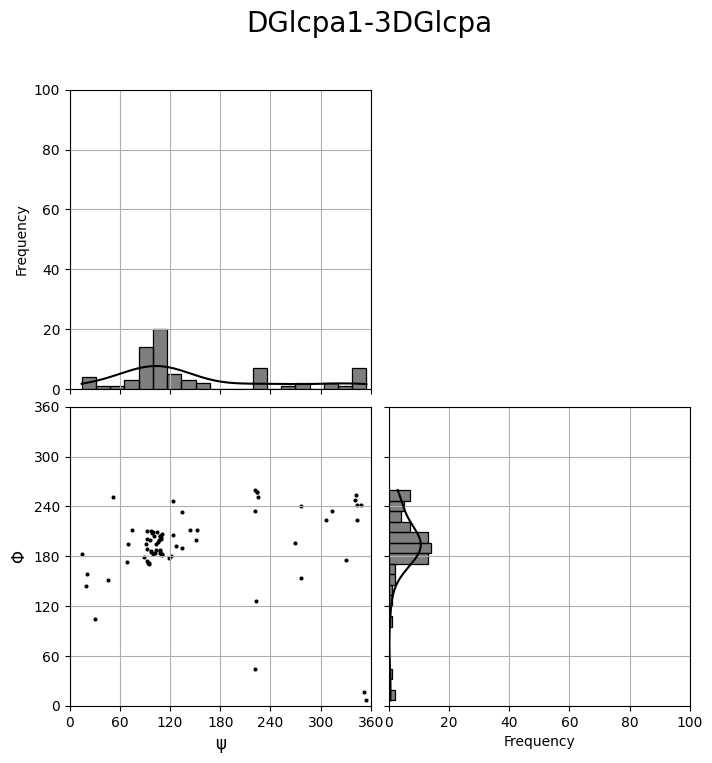

In [16]:
instant1.plot(torsions=instant1.torsions, title='DGlcpa1-3DGlcpa',max_histogram_scale=100,step_histogram_tick=20)